# Dataset German Traffic Sign

Ditulis Oleh : **Ahmad Wandi**

**Sosmed**


[![My Skills](https://skillicons.dev/icons?i=github&theme=light)](https://github.com/Mayumiwandi)
[![My Skills](https://skillicons.dev/icons?i=instagram&theme=light)](https://www.instagram.com/yumi_fantasy)
[![My Skills](https://skillicons.dev/icons?i=linkedin&theme=light)](https://www.linkedin.com/in/ahmad-wandi-091b8a240/)


![GTSRB - Tolok Ukur Pengenalan Rambu Lalu Lintas Jerman](https://github.com/Mayumiwandi/Proyek-Machine-Learning-Dicoding-Predictive-Analytics-Kualitas-Apel/assets/84662810/6140d618-976d-4ada-a0ab-c76467be028d)

 Dataset German Traffic Sign (GTSRB) adalah kumpulan data yang digunakan untuk pelatihan dan pengujian dalam pengenalan tanda lalu lintas. Dataset ini terdiri dari gambar-gambar tanda lalu lintas yang diambil dari lingkungan jalan di Jerman. Setiap gambar memiliki label yang menunjukkan jenis tanda lalu lintas yang terdapat dalam gambar tersebut. Dataset ini pertama kali diluncurkan dalam perlombaan (challenge) yang diselenggarakan oleh the International Joint Conference on Neural Networks (IJCNN) pada tahun 2011. Unduh Datasets [**German Traffic Sign**](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data)

**Informasi Datasets**

| Jenis | Keterangan |
| ------ | ------ |
| Title | _GTSRB - German Traffic Sign Recognition Benchmark_ |
| Source | [Kaggle](https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign/data) |
| Maintainer | [Mykola](https://www.kaggle.com/meowmeowmeowmeowmeow) |
| License | CC0: Public Domain |
| Visibility | Publik |
| Tags | _Online Communities, Image, Classification_ |
| Usability | 8.24 |

Dataset ini terdiri dari 43 kelas yang berbeda, mewakili berbagai jenis tanda lalu lintas yang digunakan di Jerman.    
- Terdapat 3 buah folder yaitu: *Meta, Train, dan Test*. Namun pada datasets ini 3 buah folder tadi terduplikate.  
- Dan terdapat file 3 berformats CSV yaitu: *Meta.csv, Test.csv, Train.csv*

## Loading Data

### Import Library

In [1]:
import os
import cv2
import zipfile
import random as rn


import pandas as pd
import numpy as np
from google.colab import files

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.models import Sequential, load_model
from keras.layers import Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report



import matplotlib
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
matplotlib.style.use('ggplot')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
!pip install -q kaggle

In [ ]:
files.upload()

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d meowmeowmeowmeowmeow/gtsrb-german-traffic-sign

100% 610M/612M [00:15<00:00, 44.8MB/s]
100% 612M/612M [00:15<00:00, 40.2MB/s]


### Extrac File

In [10]:
zip_ref = zipfile.ZipFile('/content/gtsrb-german-traffic-sign.zip', 'r')
zip_ref.extractall('/content/gtsrb-german')
zip_ref.close()

disini saya melakukan exstrak datasets delam folder baru yang bernama gtsrb-german

In [11]:
! ls /content/gtsrb-german

meta  Meta  Meta.csv  test  Test  Test.csv  train  Train  Train.csv


### Load The Datasets

In [12]:
data_dir = '/content/gtsrb-german'
train_path = '/content/gtsrb-german/Train'
test_path = '/content/gtsrb-german'

In [13]:
NUM_CATEGORIES = len(os.listdir(train_path))
NUM_CATEGORIES

43

### Label Overview

In [14]:
classes = { 0:'Speed limit (20km/h)',
            1:'Speed limit (30km/h)',
            2:'Speed limit (50km/h)',
            3:'Speed limit (60km/h)',
            4:'Speed limit (70km/h)',
            5:'Speed limit (80km/h)',
            6:'End of speed limit (80km/h)',
            7:'Speed limit (100km/h)',
            8:'Speed limit (120km/h)',
            9:'No passing',
            10:'No passing veh over 3.5 tons',
            11:'Right-of-way at intersection',
            12:'Priority road',
            13:'Yield',
            14:'Stop',
            15:'No vehicles',
            16:'Veh > 3.5 tons prohibited',
            17:'No entry',
            18:'General caution',
            19:'Dangerous curve left',
            20:'Dangerous curve right',
            21:'Double curve',
            22:'Bumpy road',
            23:'Slippery road',
            24:'Road narrows on the right',
            25:'Road work',
            26:'Traffic signals',
            27:'Pedestrians',
            28:'Children crossing',
            29:'Bicycles crossing',
            30:'Beware of ice/snow',
            31:'Wild animals crossing',
            32:'End speed + passing limits',
            33:'Turn right ahead',
            34:'Turn left ahead',
            35:'Ahead only',
            36:'Go straight or right',
            37:'Go straight or left',
            38:'Keep right',
            39:'Keep left',
            40:'Roundabout mandatory',
            41:'End of no passing',
            42:'End no passing veh > 3.5 tons' }

## visualisasikan distribusi

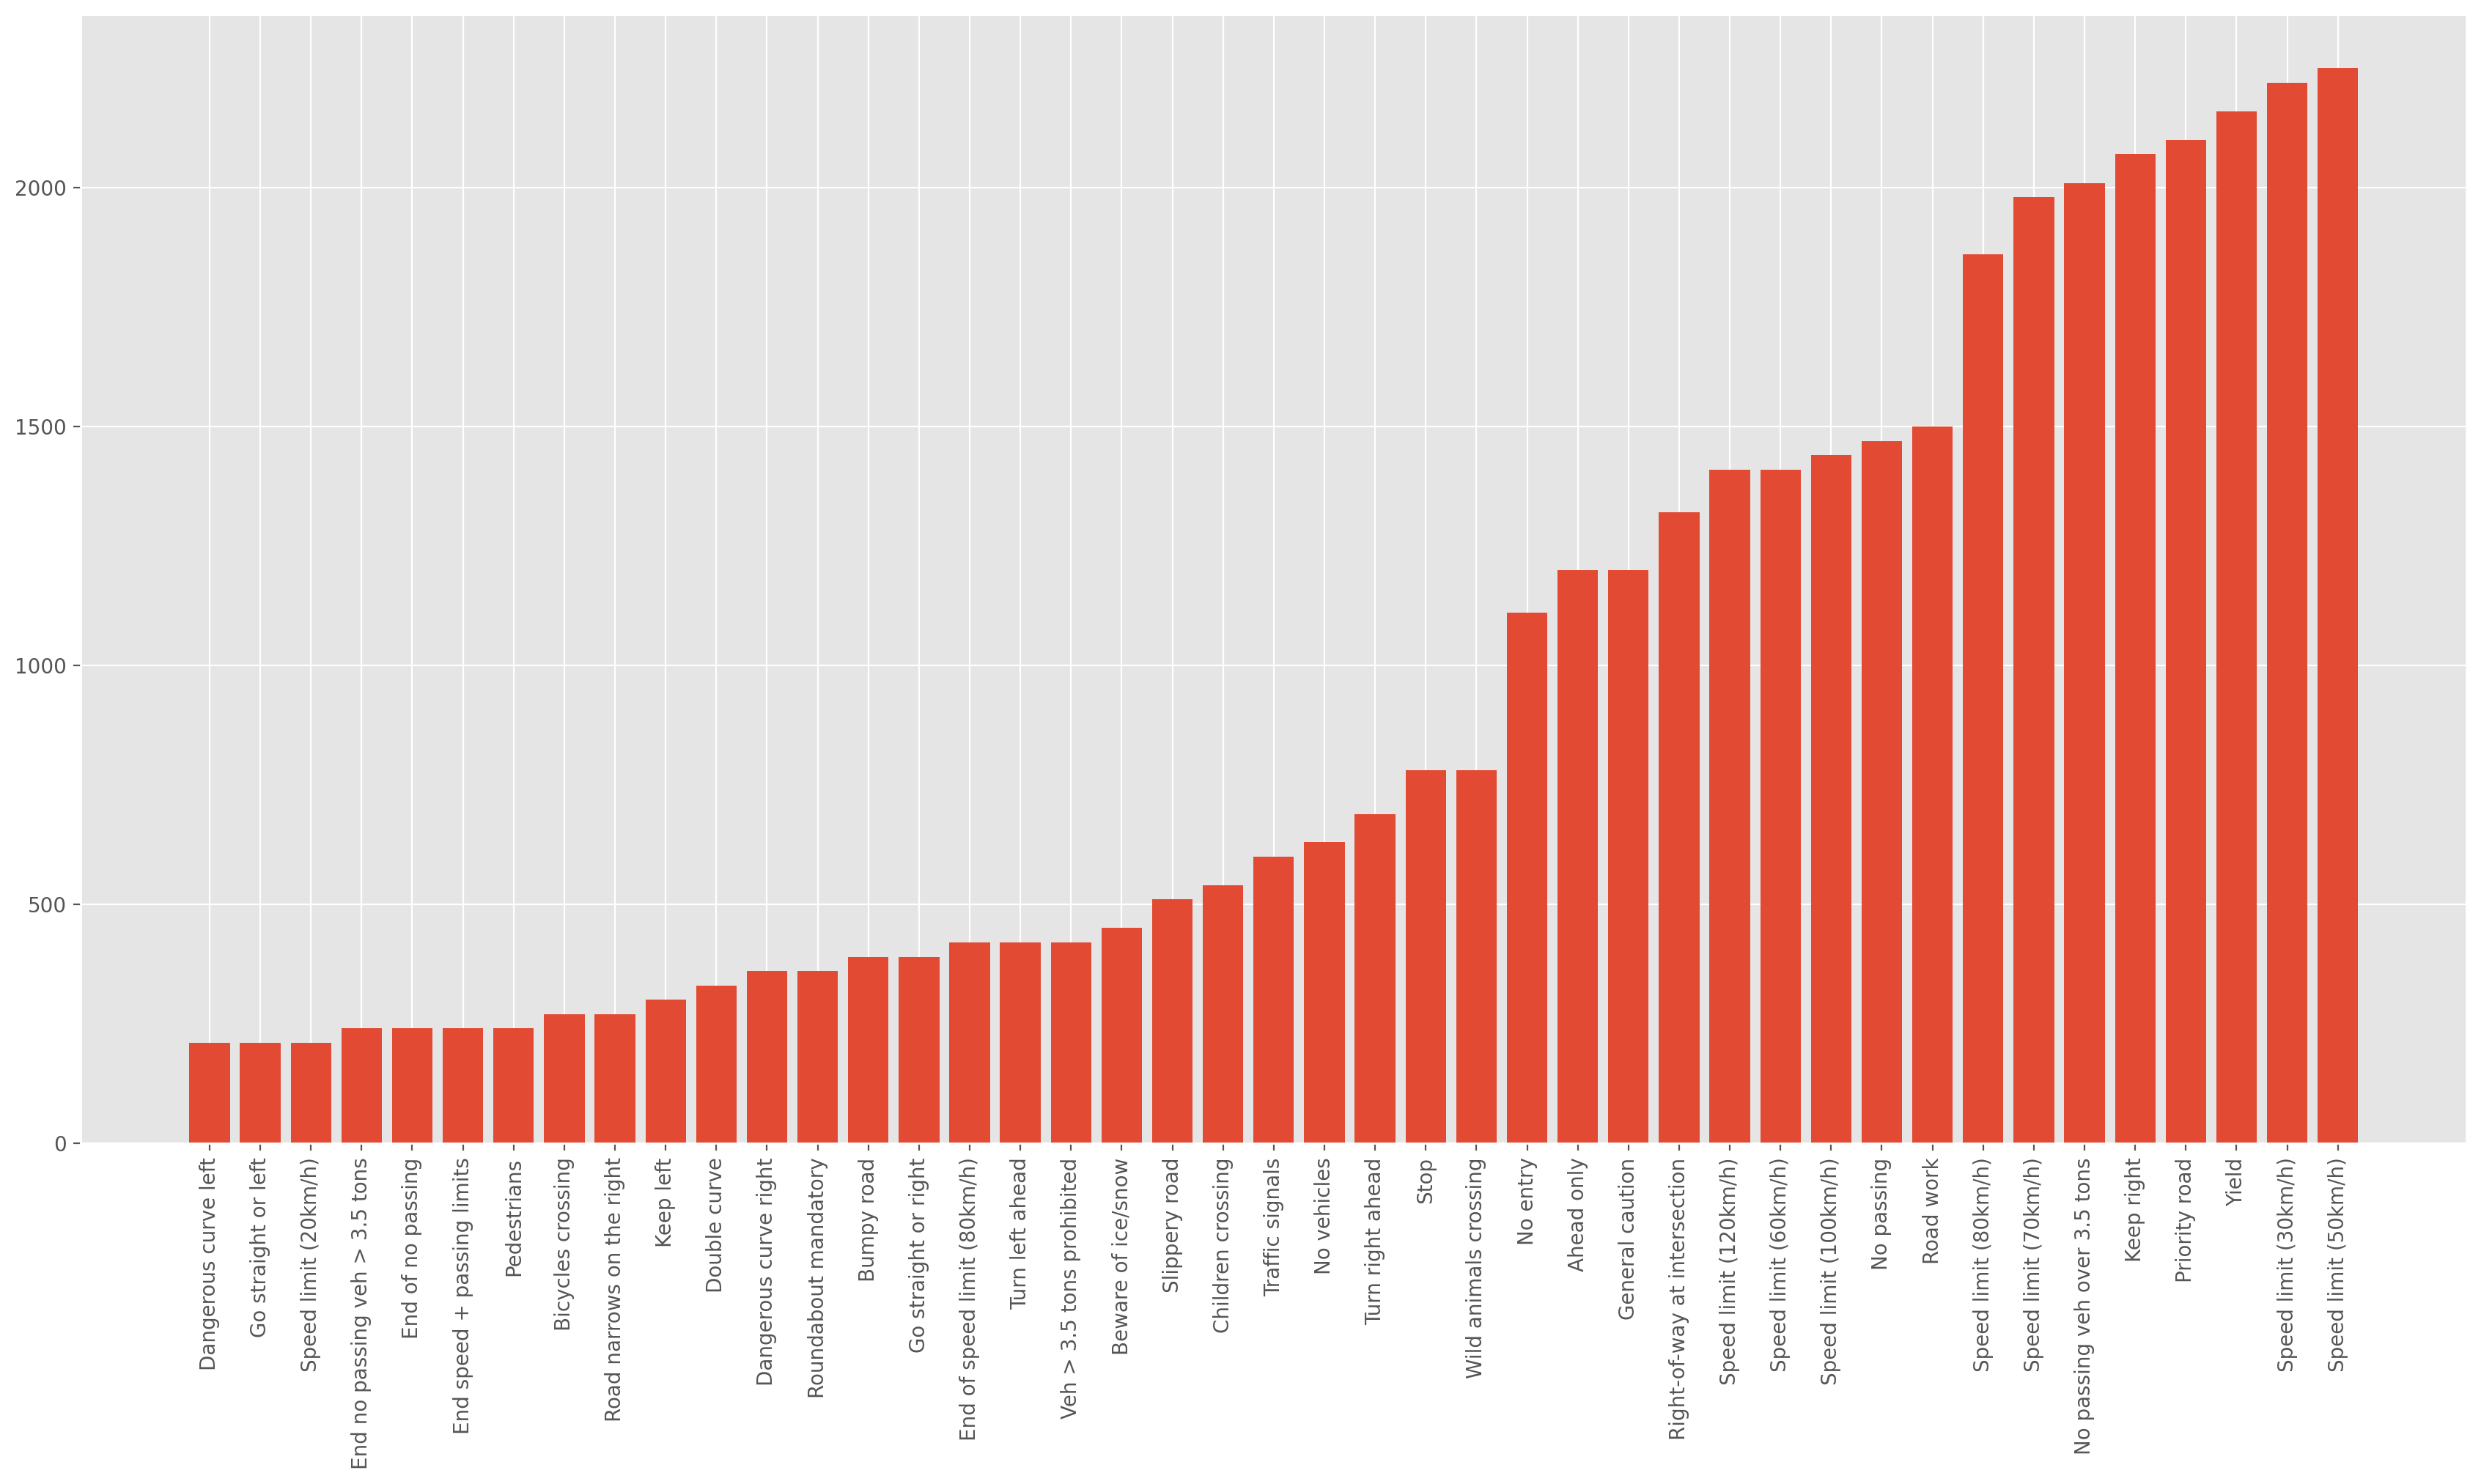

In [15]:
folders = os.listdir(train_path)

train_number = []
class_num = []

for folder in folders:
    train_files = os.listdir(train_path + '/' + folder)
    train_number.append(len(train_files))
    class_num.append(classes[int(folder)])

# Mengurutkan dataset berdasarkan jumlah gambar di setiap kelas
zipped_lists = zip(train_number, class_num)
sorted_pairs = sorted(zipped_lists)
tuples = zip(*sorted_pairs)
train_number, class_num = [ list(tuple) for tuple in  tuples]

# Plotting gambar pada setiap kelas
plt.figure(figsize=(21,10))
plt.bar(class_num, train_number)
plt.xticks(class_num, rotation='vertical')
plt.show()

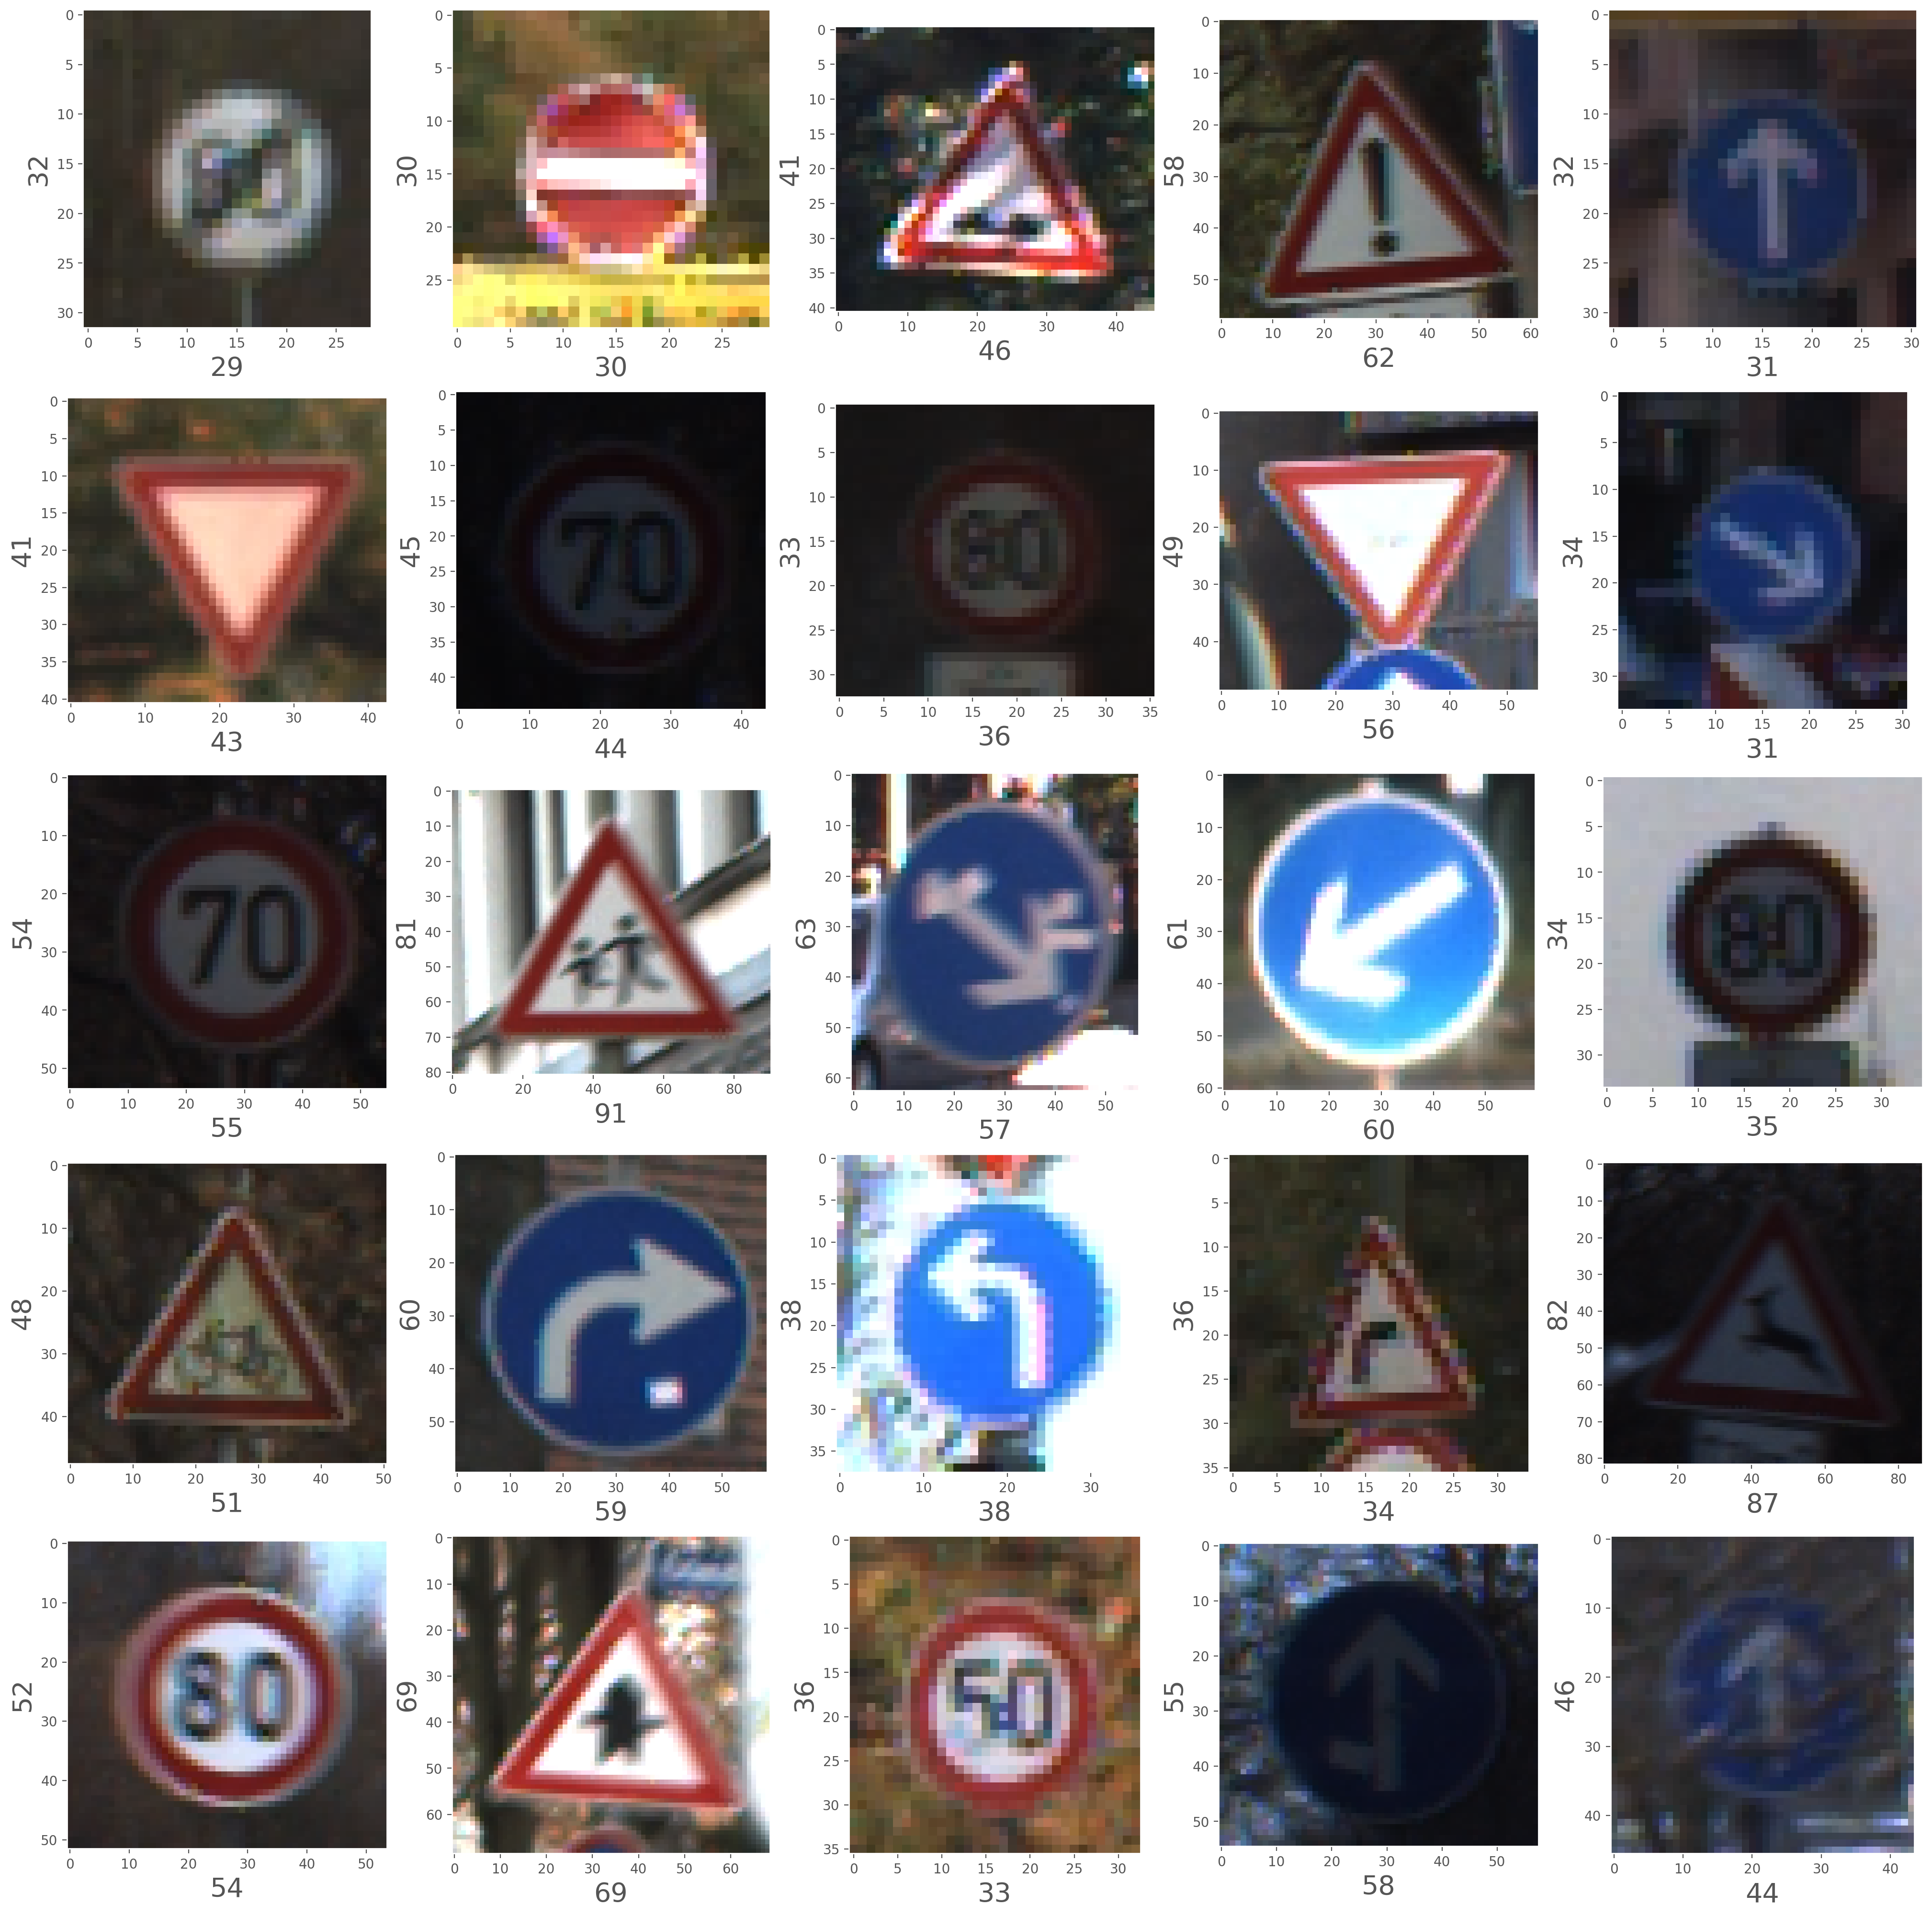

In [16]:
test = pd.read_csv(data_dir + '/Test.csv')
imgs = test["Path"].values

plt.figure(figsize=(25,25))

for i in range(1,26):
    plt.subplot(5,5,i)
    random_img_path = data_dir + '/' + rn.choice(imgs)
    rand_img = imread(random_img_path)
    plt.imshow(rand_img)
    plt.grid(visible=0)
    plt.xlabel(rand_img.shape[1], fontsize = 20)# Lebar gambar
    plt.ylabel(rand_img.shape[0], fontsize = 20)# Tinggi gambar

## Data Preprocessing

### Loading data from Train folder

In [17]:
def load_data(data_dir):

    images = list()
    labels = list()
    for category in range(NUM_CATEGORIES):
        categories = os.path.join(data_dir, str(category))
        for img in os.listdir(categories):
            img = load_img(os.path.join(categories, img), target_size=(30, 30))
            image = img_to_array(img)
            images.append(image)
            labels.append(category)

    return images, labels

### Train test split

In [18]:
images, labels = load_data(train_path)

# One hot encoding  labels
labels = to_categorical(labels)


x_train, x_test, y_train, y_test = train_test_split(
                                                    np.array(images),
                                                    labels,
                                                    test_size=0.2 ,
                                                    random_state=42,
                                                    shuffle=True
                                                    )

 Menggunakan ukuran data validasi sebesar 20% dari data training. Kita juga set random_state=42 (random state harus berupa bilangan int)

### Normalisasi data

In [19]:
x_train = x_train/255
x_test = x_test/255

Normalisasi dilakukan dengan membagi setiap nilai piksel dalam gambar dengan 255. Angka 255 adalah nilai maksimum yang bisa dicapai oleh piksel dalam gambar RGB. Dengan normalisasi ini, rentang nilai piksel akan menjadi antara 0 dan 1. Normalisasi seperti ini membantu dalam meningkatkan kinerja model karena dapat menghindari masalah pembelajaran yang tidak stabil akibat skala data yang besar.

In [20]:
print("X_train.shape", x_train.shape)
print("X_valid.shape", x_test.shape)
print("y_train.shape", y_train.shape)
print("y_valid.shape", y_test.shape)

X_train.shape (31367, 30, 30, 3)
X_valid.shape (7842, 30, 30, 3)
y_train.shape (31367, 43)
y_valid.shape (7842, 43)


## Modeling

In [21]:
IMG_HEIGHT = 30
IMG_WIDTH = 30

In [22]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH,3)),
    keras.layers.Conv2D(filters=32, kernel_size=(5,5), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(rate=0.25),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPool2D(pool_size=(2, 2)),
    keras.layers.Dropout(0.25),

    keras.layers.Flatten(),
    keras.layers.Dense(256, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(43, activation='softmax')
])

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 11, 11, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

### Visual Keras

[**Visualkeras**](https://github.com/paulgavrikov/visualkeras) adalah paket Python untuk membantu memvisualisasikan arsitektur jaringan saraf Keras (baik mandiri atau termasuk dalam TensorFlow).

In [24]:
!pip install visualkeras


import visualkeras


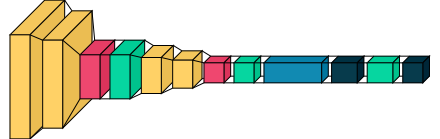

In [25]:
visualkeras.layered_view(model)

### Menerapkan Callback

In [26]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy') > 0.96):
      print("\nAkurasi telah mencapai >96%. Stop training!")
      self.model.stop_training = True
callbacks = myCallback()

### Compiling the model

In [27]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

### Image Generator

In [28]:
aug = ImageDataGenerator(
    rotation_range=10,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.15,
    horizontal_flip=False,
    vertical_flip=False,
    fill_mode="nearest")

### Model Fiting

In [29]:
epochs = 30
history = model.fit(aug.flow(x_train,
                    y_train, batch_size = 32),
                    validation_data = (x_test, y_test),
                    epochs=epochs,
                    callbacks=[callbacks])

Epoch 1/30
981/981 [==============================] - 114s 115ms/step - loss: 2.1522 - accuracy: 0.3707 - val_loss: 0.7806 - val_accuracy: 0.7562
Epoch 2/30
981/981 [==============================] - 112s 114ms/step - loss: 0.9071 - accuracy: 0.7079 - val_loss: 0.2363 - val_accuracy: 0.9323
Epoch 3/30
981/981 [==============================] - 113s 115ms/step - loss: 0.5603 - accuracy: 0.8221 - val_loss: 0.1491 - val_accuracy: 0.9584
Epoch 4/30
981/981 [==============================] - 112s 114ms/step - loss: 0.4115 - accuracy: 0.8684 - val_loss: 0.0909 - val_accuracy: 0.9731
Epoch 5/30
981/981 [==============================] - 115s 117ms/step - loss: 0.3425 - accuracy: 0.8930 - val_loss: 0.0756 - val_accuracy: 0.9749
Epoch 6/30
981/981 [==============================] - 111s 113ms/step - loss: 0.2941 - accuracy: 0.9078 - val_loss: 0.0567 - val_accuracy: 0.9829
Epoch 7/30
981/981 [==============================] - 111s 113ms/step - loss: 0.2556 - accuracy: 0.9203 - val_loss: 0.0565 -

### Save Model

In [30]:
model.save("my_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Visualisasi Loss Model

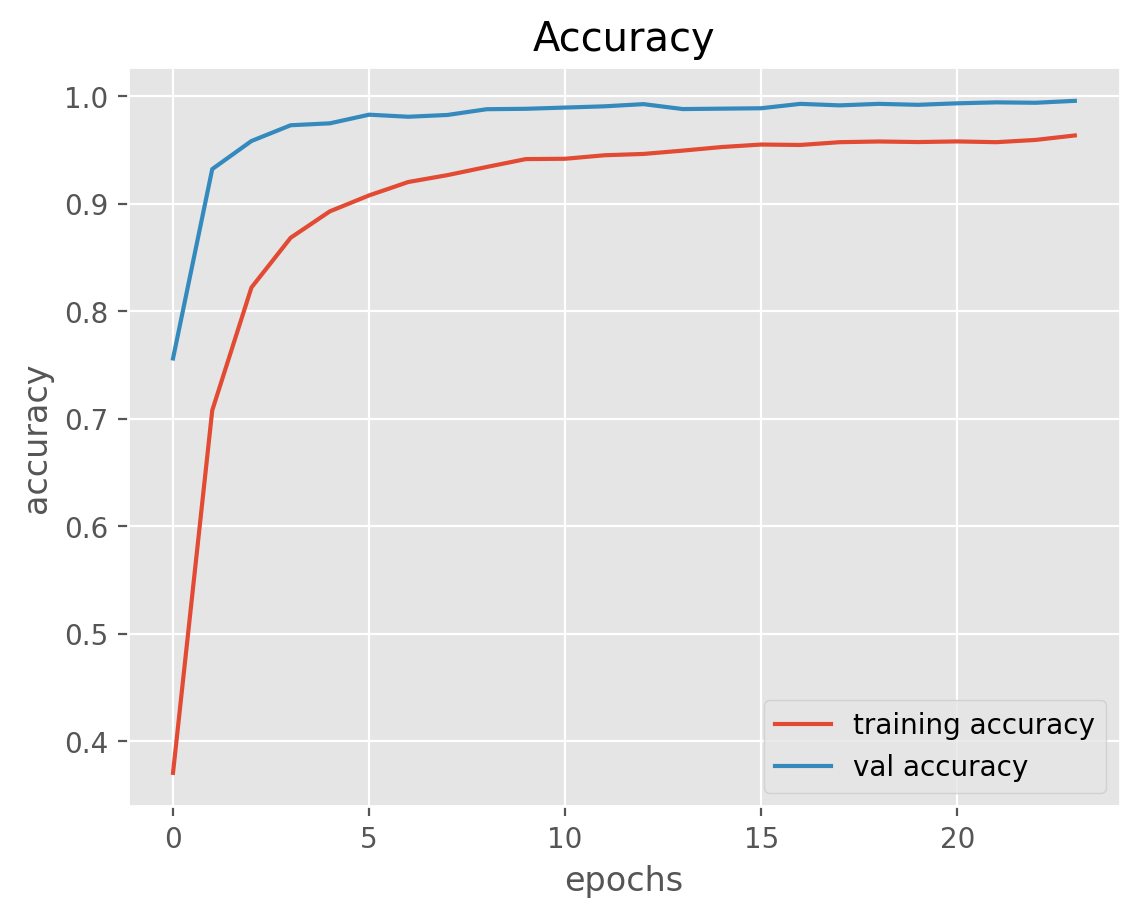

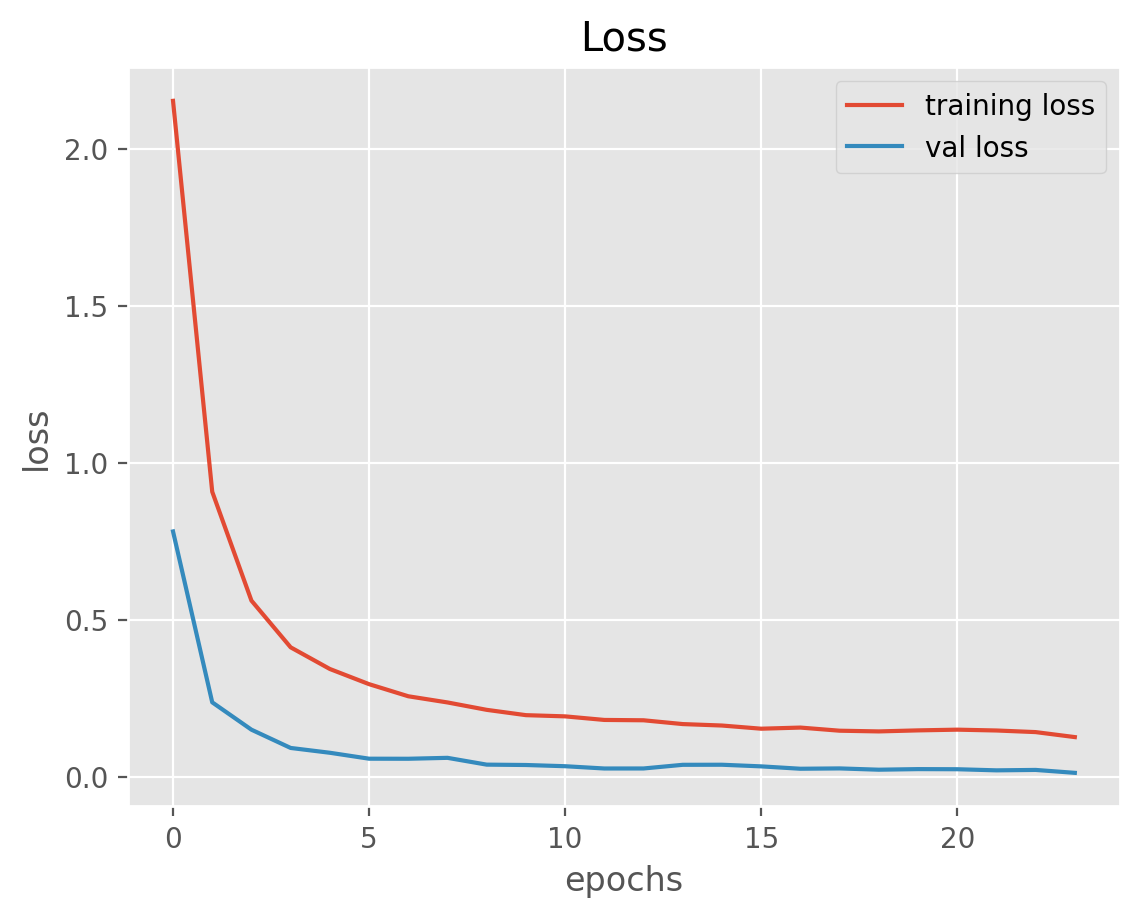

In [32]:
# Plotting graphs for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

# Plotting graphs for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

## Testing Model

### find the predictions

In [33]:
Y_test = pd.read_csv(test_path + '/Test.csv')
test_labels = Y_test["ClassId"].values
test_images = Y_test["Path"].values

output = list()
for img in test_images:
    image = load_img(os.path.join(test_path, img), target_size=(30, 30))
    output.append(np.array(image))

X_test=np.array(output)
pred = model.predict(X_test)
pred=np.argmax(pred, axis=1)

# accuracy dengan data uji
print('Test Data accuracy: ',accuracy_score(test_labels, pred)*100)

395/395 [==============================] - 10s 25ms/step
Test Data accuracy:  95.39192399049881


### Classification report

In [34]:
print(classification_report(test_labels, pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89        60
           1       0.92      0.99      0.96       720
           2       0.92      0.99      0.96       750
           3       0.99      0.92      0.95       450
           4       0.98      0.98      0.98       660
           5       0.96      0.90      0.93       630
           6       1.00      0.79      0.88       150
           7       0.98      0.97      0.97       450
           8       0.99      0.91      0.95       450
           9       0.99      0.96      0.98       480
          10       1.00      0.98      0.99       660
          11       0.96      0.89      0.92       420
          12       0.99      0.98      0.99       690
          13       1.00      0.99      0.99       720
          14       0.99      1.00      0.99       270
          15       1.00      0.95      0.97       210
          16       0.89      1.00      0.94       150
          17       1.00    

### Prediksi Gambar

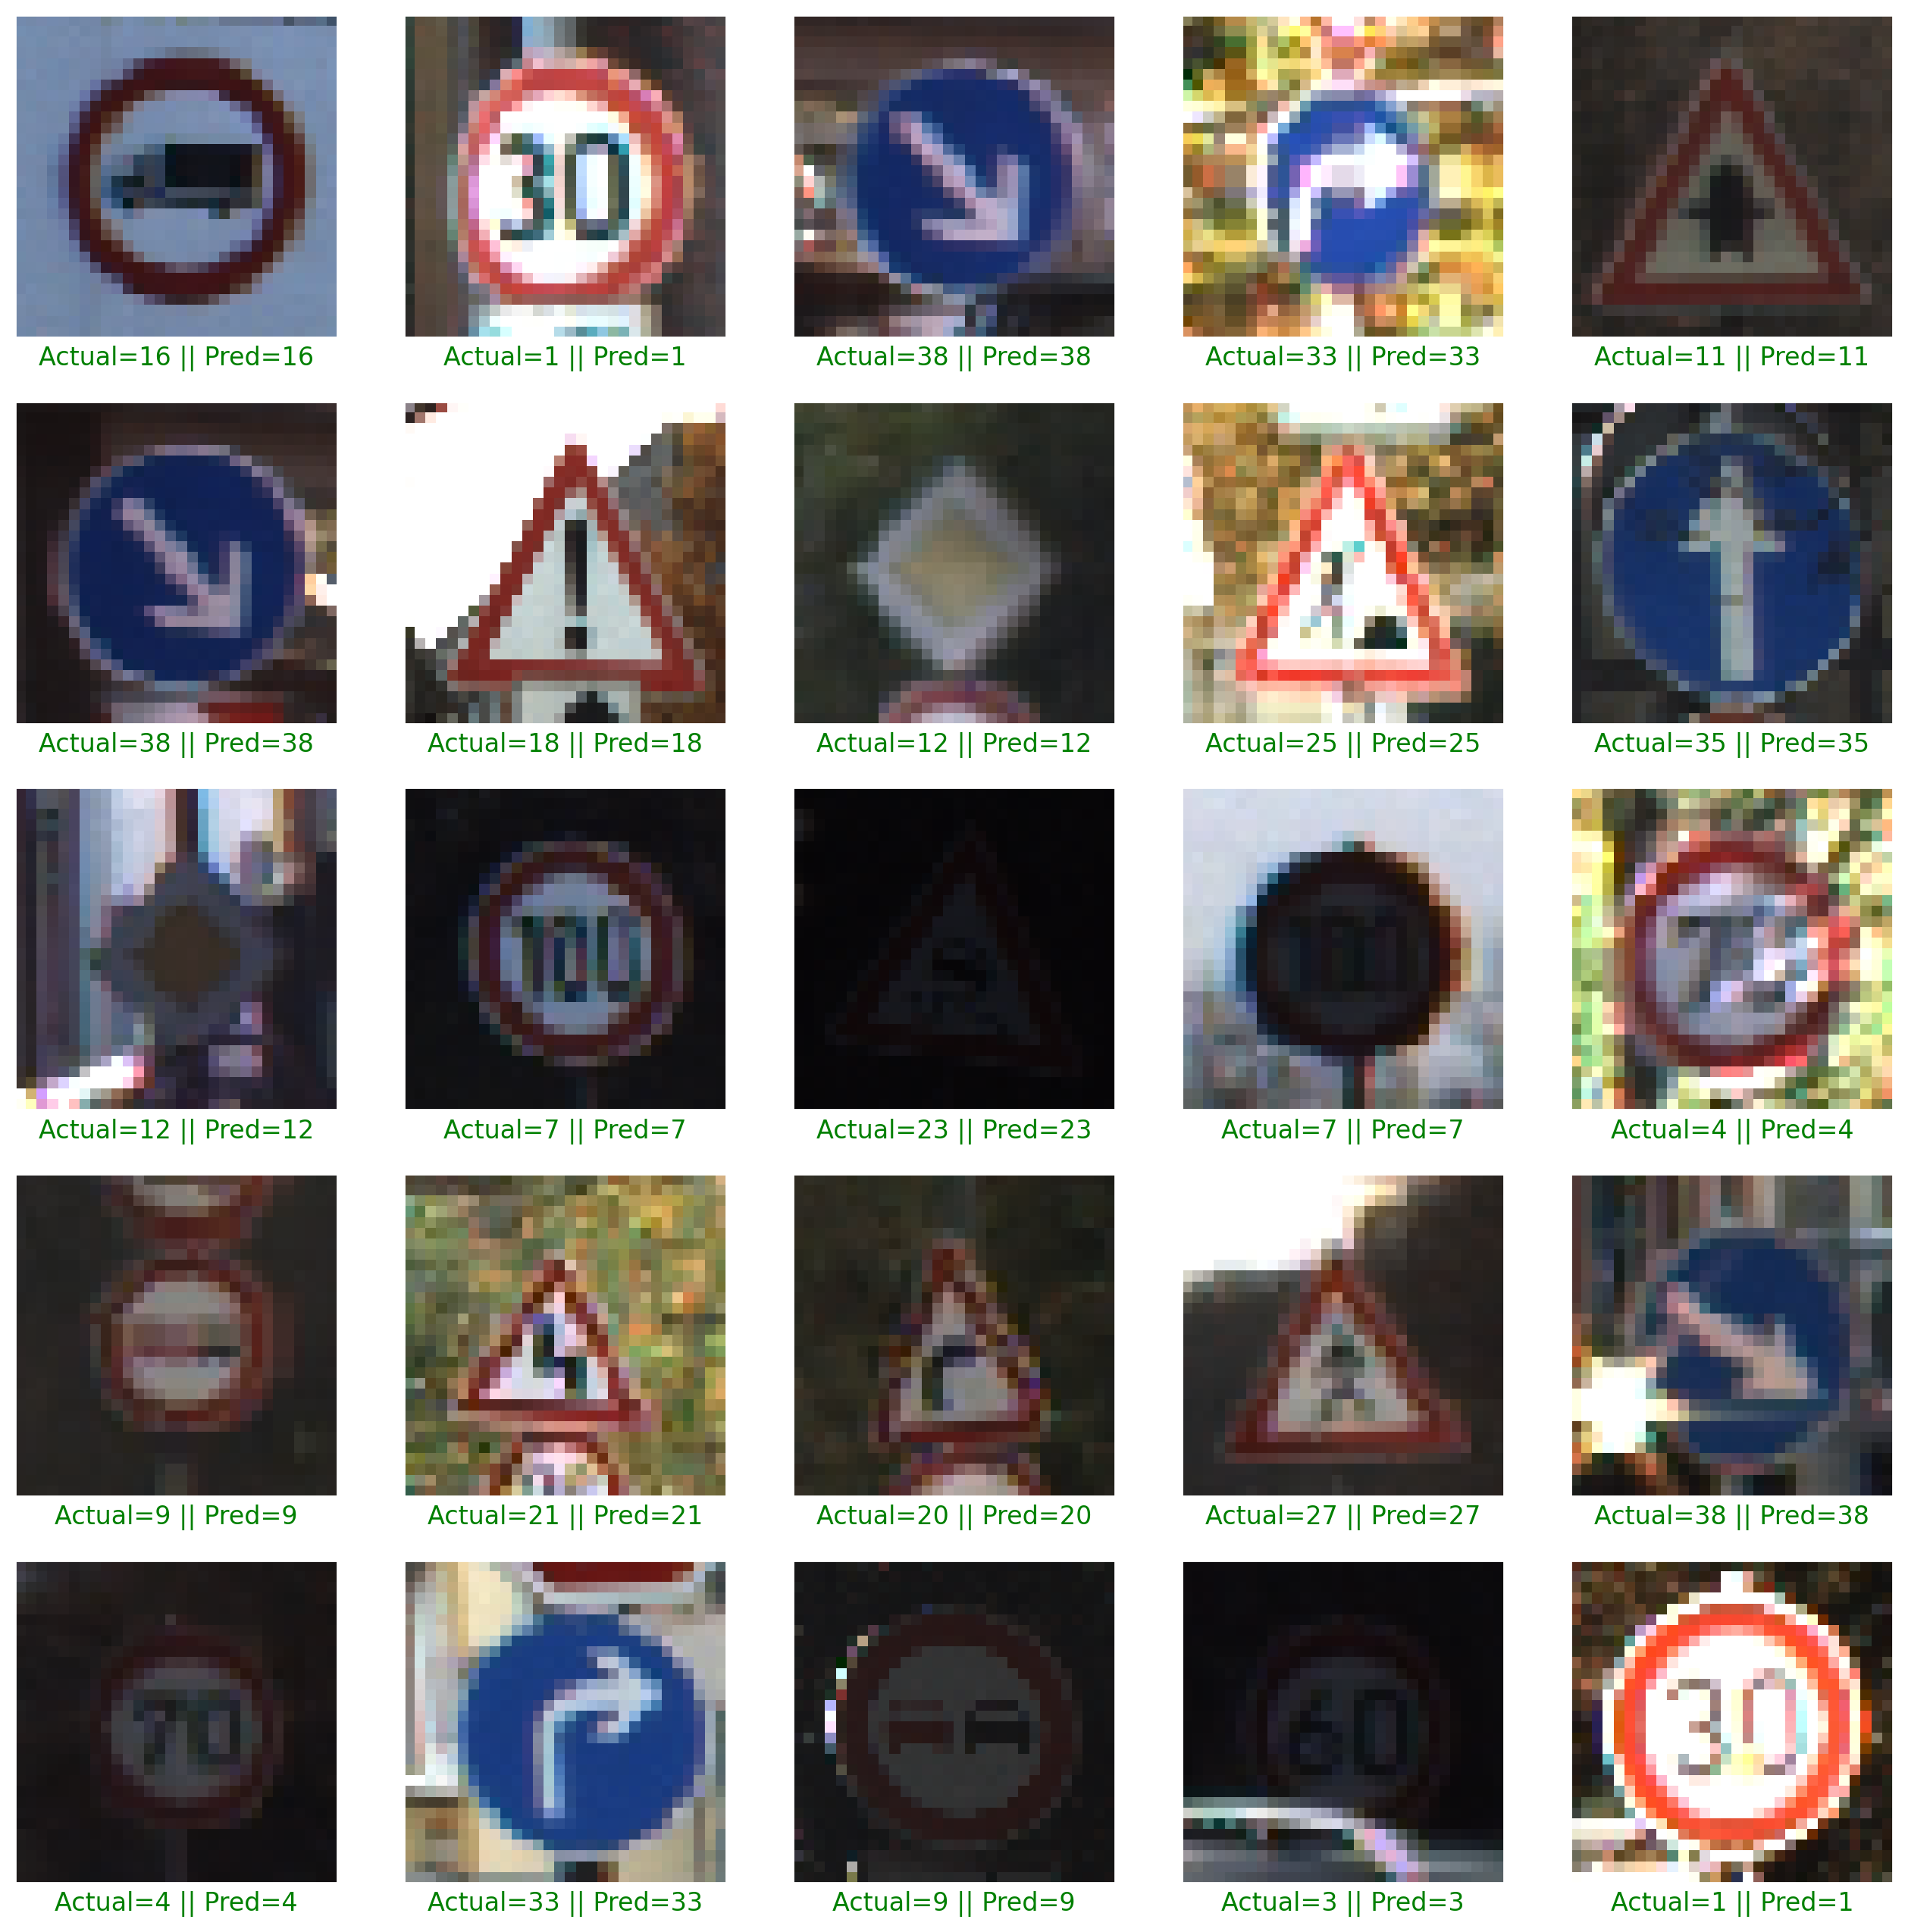

In [35]:
plt.figure(figsize = (16, 16))

start_index = 0
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    prediction = pred[start_index + i]
    actual = test_labels[start_index + i]
    col = 'g'
    if prediction != actual:
        col = 'r'
    plt.xlabel('Actual={} || Pred={}'.format(actual, prediction), color = col)
    plt.imshow(X_test[start_index + i])
plt.show()

Dapat dilihat pada gambar diatas prediksi terhadap gambar benar semua yang ditunjukan anggkanya adalah sama. Ini menunjukan bahwa model kita sudah cukup baik dalam mengenal gambar.